<a href="https://colab.research.google.com/github/MosEZE/Statistics-for-data-science-for-python/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm



In [5]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv"
df = pd.read_csv(url)

# Drop index col if present
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

print("Shape:", df.shape)
df.head()



Shape: (506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [6]:
df.info()
df.describe().T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


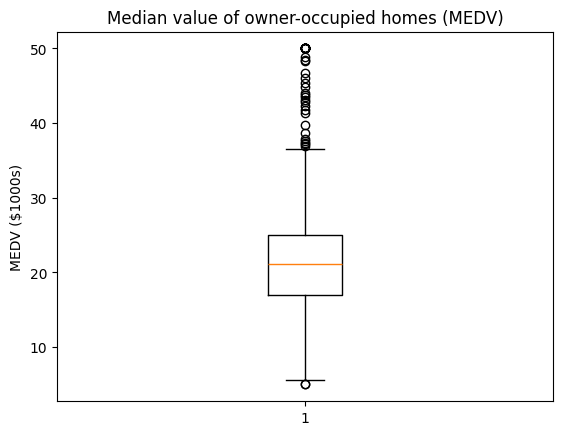

In [17]:
# Boxplot MEDV
plt.boxplot(df['MEDV'])
plt.title("Median value of owner-occupied homes (MEDV)")
plt.ylabel("MEDV ($1000s)")
plt.show()

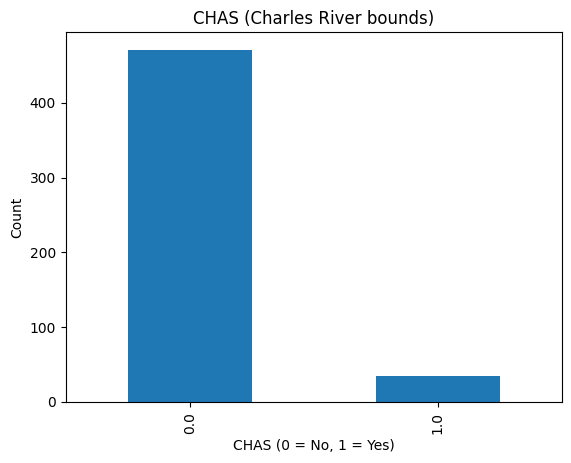

In [20]:
# Barplot CHAS
df['CHAS'].value_counts().sort_index().plot(kind="bar")
plt.title("CHAS (Charles River bounds)")
plt.xlabel("CHAS (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

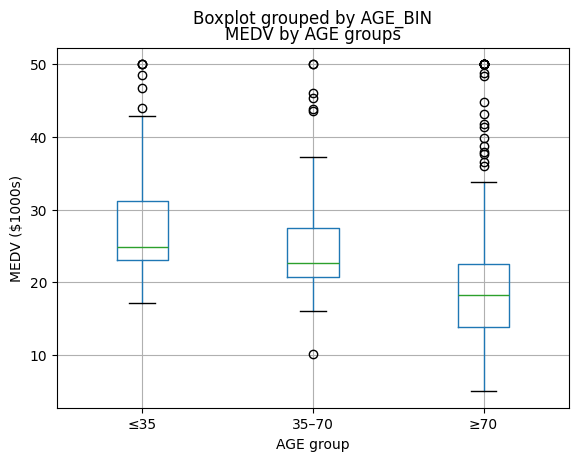

In [21]:
# Boxplot MEDV vs AGE groups
age_bins = [-np.inf, 35, 70, np.inf]
age_labels = ["≤35", "35–70", "≥70"]
df['AGE_BIN'] = pd.cut(df['AGE'], bins=age_bins, labels=age_labels) #
df.boxplot(column="MEDV", by="AGE_BIN")
plt.title("MEDV by AGE groups")
plt.xlabel("AGE group")
plt.ylabel("MEDV ($1000s)")
plt.show()

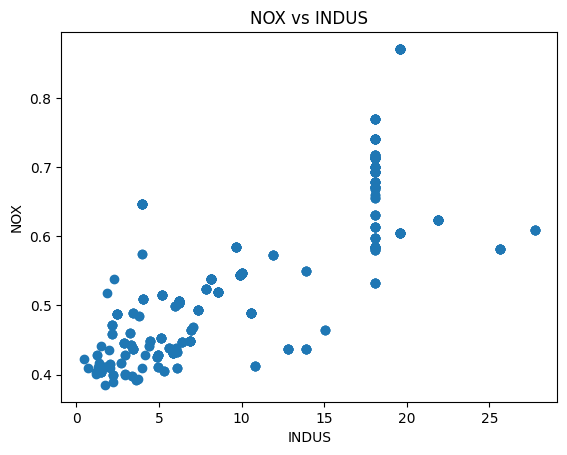

Pearson r = 0.7636514469209154 p-value = 7.913361061239639e-98


In [10]:
# Scatter NOX vs INDUS
plt.scatter(df['INDUS'], df['NOX'])
plt.title("NOX vs INDUS")
plt.xlabel("INDUS")
plt.ylabel("NOX")
plt.show()
r, p = stats.pearsonr(df['INDUS'], df['NOX'])
print("Pearson r =", r, "p-value =", p)

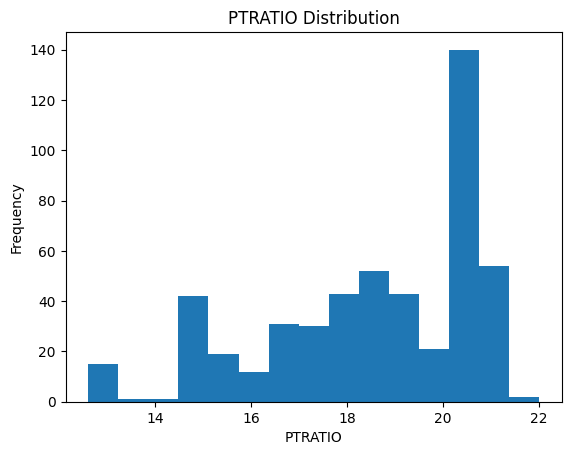

In [11]:
# Histogram PTRATIO
plt.hist(df['PTRATIO'], bins=15)
plt.title("PTRATIO Distribution")
plt.xlabel("PTRATIO")
plt.ylabel("Frequency")
plt.show()

In [12]:
# T-test: CHAS vs MEDV
medv_chas1 = df[df['CHAS']==1]['MEDV']
medv_chas0 = df[df['CHAS']==0]['MEDV']
t, p = stats.ttest_ind(medv_chas1, medv_chas0, equal_var=False)
print("T-test:", t, p)
# the t-test result show a value less than .05 which suggests a large difference in median value of houses bounded by the Charles river

T-test: 3.113291312794837 0.0035671700981375174


In [13]:
# ANOVA: MEDV ~ AGE groups

# Not sure what to do here unfortunately

SyntaxError: invalid syntax (ipython-input-1823642145.py, line 2)

In [14]:
# Pearson correlation: NOX ~ INDUS
r, p = stats.pearsonr(df['INDUS'], df['NOX'])
print("Correlation:", r, p)
# Rather high positive correlation suggesting a strong statistical relevant relationship

Correlation: 0.7636514469209154 7.913361061239639e-98


In [22]:
# Regression: MEDV ~ DIS
model = smf.ols("MEDV ~ DIS", data=df).fit()
print(model.summary())

#R-squared: 0.062. This means that approximately 6.2% of the variation in 'MEDV' can be explained by the 'DIS' variable.
#This indicates a rather weak linear relationship as its only 6.2%.
#F-statistic: 33.58 with a Prob: 1.21e-08. The very small p-value (close to zero) for the F-statistic shows that the
#regression model is statistically significant. This means that 'DIS' is a predictor of 'MEDV', even though it only explains a small amount of the variance.

#Coefficients:Intercept: 18.3901. This is the estimaed median value of owner-occupied homes when the weighted mean of distances to employment centers is zero.
#DIS: 1.0916. This is the estimated change in 'MEDV' for a one-unit increase in 'DS'.
#p value for the ttest for DIS: 0.000. The p-value for the 'DIS' coefficient is very small (close to zero), which shows that the relationship between 'DIS' and 'MEDV' is statistically significant.


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 01 Sep 2025   Prob (F-statistic):           1.21e-08
Time:                        20:15:03   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.3901      0.817     22.499      0.0